# cuhf results
We will show some values for cuhf molecules. The goal of this notbook will be the comparison to uhf, as well as show the correctness of the cuhf code

In [1]:
# importing the needed classes
import psi4
import sys
from compChem.Hartree_Fock_modes.cuhf import CUHFMolecule

In [3]:
# molecule n°1: trihydrogen
psi4.set_options({"basis":"cc-pvdz", "scf_type":"pk", "reference":"cuhf", "e_convergence":"1e-8"})
h3 = CUHFMolecule("""
H 0 0 0
H 0 0.86602540378 0.5
H 0 0 1
units angstrom""")
h3.setConvergence(1e-8)
end_data = h3.iterator(mute=True, criterion="energy")
f"scf energy {end_data[0]: .14f}, {end_data[1]} iterations"

/user/gent/440/vsc44013/.local/lib/python3.7/site-packages/compChem/Hartree_Fock_modes/cuhf.py:107: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  assert self.guessMatrix_a != "empty" and self.guessMatrix_b != "empty", "make a guess first"
/user/gent/440/vsc44013/.local/lib/python3.7/site-packages/compChem/Hartree_Fock_modes/hf_backbone.py:65: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self.guessMatrix_a == "empty" and self.guessMatrix_b == "empty":


'scf energy -1.50311185532716, 24 iterations'

In [3]:
psi4.energy("scf")

-1.503111863155322

In [4]:
# molecule n°2: allyl radical
psi4.set_options({"basis":"sto-3g", "scf_type":"pk", "reference":"cuhf", "e_convergence":"1e-12"})
allyl = CUHFMolecule("""
0 2
H
C 1 r2
C 2 r3 1 a3
C 2 r3 1 a3 3 180.
H 3 r5 2 a5 1 0.
H 4 r5 2 a5 1 0.
H 3 r7 2 a7 1 180.
H 4 r7 2 a7 1 180.

r2=1.08424658
r3=1.40526604
r5=1.08095381
r7=1.08131649
a3=117.99450641
a5=121.41544408
a7=121.21891262
symmetry c1

""")
allyl.setConvergence(1e-12)
end_data = allyl.iterator(mute=True, criterion="energy")
f"scf energy {end_data[0]: .14f}, {end_data[1]} iterations"

'scf energy -115.00893006174019, 35 iterations'

In [3]:
psi4.energy("scf")

-115.00893006028244

We will now do a stretch of the hydrogen gas molecule

In [2]:
psi4.set_options({"basis":"sto-3g", "scf_type":"pk", "reference":"cuhf", "e_convergence":"1e-12"})
hydrogen = CUHFMolecule("""H""")
hydrogen.setConvergence(1e-12)
h_energy = hydrogen.iterator(mute=True)
h_energy[0]

/user/gent/440/vsc44013/.local/lib/python3.7/site-packages/compChem/Hartree_Fock_modes/cuhf.py:109: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  assert self.guessMatrix_a != "empty" and self.guessMatrix_b != "empty", "make a guess first"
/user/gent/440/vsc44013/.local/lib/python3.7/site-packages/compChem/Hartree_Fock_modes/hf_backbone.py:65: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self.guessMatrix_a == "empty" and self.guessMatrix_b == "empty":


-0.46658184955727544

In [3]:
import numpy as np
distances = np.arange(0.2, 5, 0.1)
energies = []
for distance in distances:
    h2 = CUHFMolecule(f"""
    H 0 0 0 
    H 0 0 {distance}
    """)
    h2.setConvergence(1e-12)
    E = h2.iterator(mute=True, criterion="energy", mixedGuess=False)
    energies.append(E[0] - 2*h_energy[0])

/user/gent/440/vsc44013/.local/lib/python3.7/site-packages/compChem/Hartree_Fock_modes/cuhf.py:109: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  assert self.guessMatrix_a != "empty" and self.guessMatrix_b != "empty", "make a guess first"
/user/gent/440/vsc44013/.local/lib/python3.7/site-packages/compChem/Hartree_Fock_modes/hf_backbone.py:65: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self.guessMatrix_a == "empty" and self.guessMatrix_b == "empty":


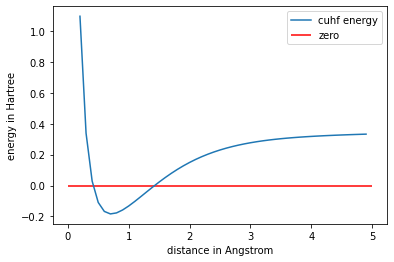

In [4]:
import matplotlib.pyplot as plt
p = plt.plot(distances, energies, label="cuhf energy")
plt.hlines(0, 0, 5, color="red", label="zero")
plt.xlabel("distance in Angstrom")
plt.ylabel("energy in Hartree")
plt.legend(loc="upper right")
p

For this plot, we have removed the mixedGuess. This means that we do not break the symmetry for the density matrices, and keep them identical to one another.

### all stretches plot together

In [5]:
from compChem.Hartree_Fock_modes.uhf import UHFMolecule
from compChem.Hartree_Fock_modes.rhf import RHFMolecule
distances = np.arange(0.2, 5, 0.1)
energies = []
for distance in distances:
    local = []
    h2_c = CUHFMolecule(f"""
    H 0 0 0 
    H 0 0 {distance}
    """)
    h2_r = RHFMolecule(f"""
    H 0 0 0 
    H 0 0 {distance}
    """)
    h2_u = UHFMolecule(f"""
    H 0 0 0 
    H 0 0 {distance}
    """)
    h2_c.setConvergence(1e-12)
    h2_r.setConvergence(1e-12)
    h2_u.setConvergence(1e-12)
    E = h2_c.iterator(mute=True, criterion="energy", mixedGuess=False)
    local.append(E[0] - 2*h_energy[0])
    E = h2_u.iterator(mute=True, criterion="energy")
    local.append(E[0] - 2*h_energy[0])
    E = h2_r.iterator(mute=True, criterion="energy")
    local.append(E[0] - 2*h_energy[0])
    energies.append(local)

/user/gent/440/vsc44013/.local/lib/python3.7/site-packages/compChem/Hartree_Fock_modes/cuhf.py:109: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  assert self.guessMatrix_a != "empty" and self.guessMatrix_b != "empty", "make a guess first"
/user/gent/440/vsc44013/.local/lib/python3.7/site-packages/compChem/Hartree_Fock_modes/hf_backbone.py:65: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self.guessMatrix_a == "empty" and self.guessMatrix_b == "empty":
/user/gent/440/vsc44013/.local/lib/python3.7/site-packages/compChem/Hartree_Fock_modes/uhf.py:109: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  assert self.guessMatrix_a != "empty" and self.guessMatrix_b != "empty", "make a guess first"


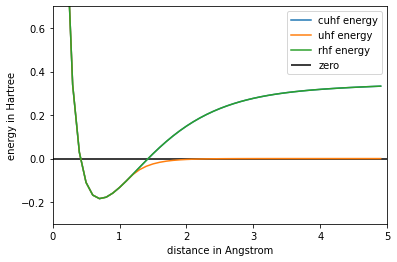

In [9]:
p = plt.plot(distances, energies)
plt.hlines(0, 0, 5, color="black", label="zero")
plt.xlabel("distance in Angstrom")
plt.ylabel("energy in Hartree")
plt.legend(["cuhf energy", "uhf energy", "rhf energy", "zero"], loc="upper right")
plt.axis([0, 5, -0.3, 0.7])
p

In this plot we can see that the cuhf and the cuhf energy are in fact the same all the way trough. This is a consequence of the fact that we removed the mixedGuess.